# Slidin' Videos: Use high-precision text tracking and semantic segmentation for chapters generation

#### Please register for the Slidin' Videos challenge to get download URLs used in this notebook 

## 1. Deeplab finetuning
#### DeepLabV3 model is a pretrained model for semantic segmentation of images. We will finetune it on Slidin' Videos dataset of slide titles

In [8]:
!git clone https://github.com/msminhas93/DeepLabv3FineTuning.git
!pip install -r DeepLabv3FineTuning/requirements.txt

Cloning into 'DeepLabv3FineTuning'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 352 (delta 3), reused 7 (delta 2), pack-reused 340
Receiving objects: 100% (352/352), 4.09 MiB | 19.84 MiB/s, done.
Resolving deltas: 100% (24/24), done.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


#### Download title masks collection and unzip it to the cloned repository. 

In [9]:
!wget -O slidin_videos_title_segmentation.zip $TITLEMASKS_URL
!unzip -q slidin_videos_title_segmentation.zip -d DeepLabv3FineTuning/

--2022-10-20 05:38:56--  ***
Resolving ituint-my.sharepoint.com (ituint-my.sharepoint.com)... 13.107.138.9, 13.107.136.9
Connecting to ituint-my.sharepoint.com (ituint-my.sharepoint.com)|13.107.138.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: *** [following]
--2022-10-20 05:38:57--  *** 
Reusing existing connection to ituint-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 170887243 (163M) [application/x-zip-compressed]
Saving to: ‘slidin_videos_title_segmentation.zip’

slidin_videos_title 100%[===================>] 162.97M  50.1MB/s    in 3.4s    

2022-10-20 05:39:01 (48.5 MB/s) - ‘slidin_videos_title_segmentation.zip’ saved [170887243/170887243]



#### Training DeepLab model: our goal is to maximize test_f1_score
#### You may want to play with number of epochs, learning rate and loss function to get better results

In [1]:
%cd DeepLabv3FineTuning
from pathlib import Path

#from segmentation_models_pytorch.losses.jaccard  import JaccardLoss
#from segmentation_models_pytorch.losses.constants import BINARY_MODE
#criterion = JaccardLoss(mode=BINARY_MODE)

import torch
from sklearn.metrics import f1_score, roc_auc_score
from torch.utils import data

import datahandler
from model import createDeepLabv3
from trainer import train_model

# Create the deeplabv3 resnet101 model which is pretrained on a subset
# of COCO train2017, on the 20 categories that are present in the Pascal VOC dataset.
model = createDeepLabv3()
model.train()


data_directory = Path("TitleSegmentationDataset")
# Create the experiment directory if not present
exp_directory = Path("DemoExp")
if not exp_directory.exists():
    exp_directory.mkdir()

batch_size = 4
epochs = 10 

# Specify the evaluation metrics
metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}

# Create the dataloader
dataloaders = datahandler.get_dataloader_sep_folder(
    data_directory, image_folder="Images", mask_folder="Masks", batch_size=batch_size)



# Specify the loss function
criterion = torch.nn.MSELoss(reduction='mean')

# Specify the optimizer with a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
_ = train_model(model, 
                criterion,
                dataloaders,
                optimizer,
                bpath=exp_directory,
                metrics=metrics,
                num_epochs=epochs)

# Save the trained model
torch.save(model, exp_directory / 'weights.pt')

# Terminate
exit()
%cd ../

/home/ml/ml2/DeepLabv3FineTuning
Epoch 1/10
----------


100%|██████████| 217/217 [12:19<00:00,  3.41s/it]

Train Loss: 0.0081



100%|██████████| 60/60 [01:37<00:00,  1.63s/it]

Test Loss: 0.0091
{'epoch': 1, 'Train_loss': 0.008055632002651691, 'Test_loss': 0.009070036932826042, 'Train_f1_score': 0.4801407000091373, 'Train_auroc': 0.9544574227834729, 'Test_f1_score': 0.7013819760296749, 'Test_auroc': 0.9650366958545998}
Epoch 2/10
----------



100%|██████████| 217/217 [12:08<00:00,  3.36s/it]

Train Loss: 0.0092



100%|██████████| 60/60 [01:35<00:00,  1.59s/it]

Test Loss: 0.0354
{'epoch': 2, 'Train_loss': 0.009187549352645874, 'Test_loss': 0.03536379709839821, 'Train_f1_score': 0.71179297144464, 'Train_auroc': 0.9873988570770056, 'Test_f1_score': 0.713013333373829, 'Test_auroc': 0.9522528400944902}
Epoch 3/10
----------



100%|██████████| 217/217 [12:14<00:00,  3.38s/it]

Train Loss: 0.0104



100%|██████████| 60/60 [01:33<00:00,  1.56s/it]

Test Loss: 0.0389
{'epoch': 3, 'Train_loss': 0.010392580181360245, 'Test_loss': 0.03893352299928665, 'Train_f1_score': 0.7750671964524918, 'Train_auroc': 0.9892877989896111, 'Test_f1_score': 0.7409366351972813, 'Test_auroc': 0.9454241725632702}
Epoch 4/10
----------



100%|██████████| 217/217 [12:10<00:00,  3.36s/it]

Train Loss: 0.0292



100%|██████████| 60/60 [01:35<00:00,  1.58s/it]

Test Loss: 0.0118
{'epoch': 4, 'Train_loss': 0.029198164120316505, 'Test_loss': 0.011828336864709854, 'Train_f1_score': 0.7988294517289576, 'Train_auroc': 0.9911030296783856, 'Test_f1_score': 0.7037375299439265, 'Test_auroc': 0.9615300499533705}
Epoch 5/10
----------



100%|██████████| 217/217 [12:14<00:00,  3.38s/it]

Train Loss: 0.0025



100%|██████████| 60/60 [01:33<00:00,  1.56s/it]

Test Loss: 0.0035
{'epoch': 5, 'Train_loss': 0.0025115003809332848, 'Test_loss': 0.0035188684705644846, 'Train_f1_score': 0.8023845064524118, 'Train_auroc': 0.9907726330517326, 'Test_f1_score': 0.7550349682849643, 'Test_auroc': 0.9504174410097929}
Epoch 6/10
----------



100%|██████████| 217/217 [12:11<00:00,  3.37s/it]

Train Loss: 0.0085



100%|██████████| 60/60 [01:33<00:00,  1.56s/it]

Test Loss: 0.0023
{'epoch': 6, 'Train_loss': 0.008499449118971825, 'Test_loss': 0.0022662230767309666, 'Train_f1_score': 0.8283039222954317, 'Train_auroc': 0.9919772328145516, 'Test_f1_score': 0.7230006678344273, 'Test_auroc': 0.9399892320034638}
Epoch 7/10
----------



100%|██████████| 217/217 [12:10<00:00,  3.37s/it]

Train Loss: 0.0027



100%|██████████| 60/60 [01:33<00:00,  1.57s/it]

Test Loss: 0.0084
{'epoch': 7, 'Train_loss': 0.002676204778254032, 'Test_loss': 0.008439311757683754, 'Train_f1_score': 0.8299006157913379, 'Train_auroc': 0.9916434611665379, 'Test_f1_score': 0.7572158343713236, 'Test_auroc': 0.94668744256308}
Epoch 8/10
----------



100%|██████████| 217/217 [12:04<00:00,  3.34s/it]

Train Loss: 0.0065



100%|██████████| 60/60 [01:33<00:00,  1.56s/it]

Test Loss: 0.0038
{'epoch': 8, 'Train_loss': 0.00647845771163702, 'Test_loss': 0.003817083314061165, 'Train_f1_score': 0.8284474316529732, 'Train_auroc': 0.9921401188279677, 'Test_f1_score': 0.7593587282799955, 'Test_auroc': 0.93249581800209}
Epoch 9/10
----------



100%|██████████| 217/217 [12:06<00:00,  3.35s/it]

Train Loss: 0.0033



100%|██████████| 60/60 [01:33<00:00,  1.57s/it]

Test Loss: 0.0020
{'epoch': 9, 'Train_loss': 0.003319759387522936, 'Test_loss': 0.00198225281201303, 'Train_f1_score': 0.8482515668288304, 'Train_auroc': 0.9925597676100888, 'Test_f1_score': 0.7358004887481869, 'Test_auroc': 0.9606980109561453}
Epoch 10/10
----------



100%|██████████| 217/217 [12:08<00:00,  3.36s/it]

Train Loss: 0.0028



100%|██████████| 60/60 [01:33<00:00,  1.56s/it]


Test Loss: 0.0241
{'epoch': 10, 'Train_loss': 0.0027868435718119144, 'Test_loss': 0.024083543568849564, 'Train_f1_score': 0.8527657329132718, 'Train_auroc': 0.9928152151704435, 'Test_f1_score': 0.7640212590931383, 'Test_auroc': 0.9248622957343666}
Training complete in 137m 46s
Lowest Loss: 0.001982
/home/ml/ml2


## 2. Data Preprocessing
#### Download testset presentations for benchmarking

In [2]:
!wget -O slidin_videos_testset.zip $TESTSET_URL
!unzip -q slidin_videos_testset.zip

--2022-10-20 10:48:10--  ***
Resolving ituint-my.sharepoint.com (ituint-my.sharepoint.com)... 13.107.138.9, 13.107.136.9
Connecting to ituint-my.sharepoint.com (ituint-my.sharepoint.com)|13.107.138.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: *** [following]
--2022-10-20 10:48:10--  ***
Reusing existing connection to ituint-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1488821009 (1.4G) [application/x-zip-compressed]
Saving to: ‘slidin_videos_testset.zip’

slidin_videos_tests 100%[===================>]   1.39G  40.4MB/s    in 32s     

2022-10-20 10:48:43 (44.6 MB/s) - ‘slidin_videos_testset.zip’ saved [1488821009/1488821009]



#### The original resolution of the videos is too high, let's resize it

In [3]:
!apt install ffmpeg
!for f in testset/* ; do ffmpeg -v quiet -stats -i "$f/video.mp4" -crf 18 -c:a copy -vf scale=1280:-2 -y "$f/resized.mp4"  ;  done

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.
frame=65961 fps=215 q=-1.0 Lsize=  100398kB time=00:43:58.42 bitrate= 311.7kbits/s speed=8.62x    
frame=17129 fps=144 q=-1.0 Lsize=   45545kB time=00:11:25.15 bitrate= 544.6kbits/s speed=5.75x    
frame=18522 fps=135 q=-1.0 Lsize=   66729kB time=00:12:20.84 bitrate= 737.9kbits/s speed=5.39x    
frame=43009 fps=214 q=-1.0 Lsize=   60615kB time=00:28:40.32 bitrate= 288.6kbits/s speed=8.58x    
frame=46931 fps=214 q=-1.0 Lsize=   71547kB time=00:31:17.23 bitrate= 312.2kbits/s speed=8.55x    
frame=68014 fps=269 q=-1.0 Lsize=   88070kB time=00:45:20.54 bitrate= 265.2kbits/s speed=10.8x    
frame=13366 fps=110 q=-1.0 Lsize=   74515kB time=00:08:54.62 bitrate=1141.8kbits/s speed= 4.4x    
frame= 5091 fps=216 q=-1.0 Lsize=    5963kB time=00:03:23.60 bitrate= 239.9kbits/s speed

#### Install `slideannot` package and pre-scan every video in the testset

In [1]:
!wget -O slideannot.zip https://ituint-my.sharepoint.com/:u:/g/personal/kirill_ekshembeev_itu_int/EbehHvPSwn1Jrs6Sgr16upwBumBCpXS0sayQMP1uCMwoDg?download=1
!unzip -q slideannot.zip
!pip install -r slideannot/requirements.txt

--2022-10-20 22:45:32--  https://ituint-my.sharepoint.com/:u:/g/personal/kirill_ekshembeev_itu_int/ESDjtlqc8HFNvlgBvPTkrHwBnxPpHlubHJWHquo-CxT0IQ?download=1
Resolving ituint-my.sharepoint.com (ituint-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to ituint-my.sharepoint.com (ituint-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/kirill_ekshembeev_itu_int/Documents/Slidin%27%20Videos%20Extra%20Material/slideannot.zip?ga=1 [following]
--2022-10-20 22:45:32--  https://ituint-my.sharepoint.com/personal/kirill_ekshembeev_itu_int/Documents/Slidin%27%20Videos%20Extra%20Material/slideannot.zip?ga=1
Reusing existing connection to ituint-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 9318 (9.1K) [application/x-zip-compressed]
Saving to: ‘slideannot.zip’

slideannot.zip      100%[===================>]   9.10K  --.-KB/s    in 0s      

2022-10-20 22:45:33 (164 MB/s) - ‘slideannot.zi

#### Every text change (state) detected by `scan_video` will be saved to a separate folder with relevant OCR data (coordinates of textboxes and its text)
* state['start_idx'] - starting frame number of the state
* state['start_frame'] - numpy array containing actual frame
* state['end_idx'] - frame number of when this state ends (with a new state starting on a next frame)
* state['end_frame'] - ending and starting frames are identical in terms of textual content, but we would like to keep it both for reference
* state['boxes'] - bounding box of every textbox detected at start_frame
* state['texts'] - text recognized by OCR for each bounding box

In [34]:
from slideannot.scan import scan_video

import os
import tqdm
import cv2
import json


def save(state, save_path):
    start, end = state['start_idx'], state['end_idx']   
    os.makedirs(f'{save_path}/changes/{start}_{end}')   
    
    cv2.imwrite(f'{save_path}/changes/{start}_{end}/{start}.jpg', state['start_frame'])   
    cv2.imwrite(f'{save_path}/changes/{start}_{end}/{end}.jpg', state['end_frame'])  
    
    boxes = [ {
        'bbox': [ int(p) for p in bbox ],
        'width': int(bbox[3] - bbox[2]),
        'height': int(bbox[1] - bbox[0]),
        'text': text,
        'fontsize': 1.0 * int(bbox[3] - bbox[2]) / len(text),
    } for bbox, text in zip(state['boxes'], state['text']) ]
    
    with open(f'{save_path}/ocr/{start}.json', 'w') as f:
        f.write(json.dumps({ 'boxes': boxes }))        

videos_dir = 'testset'
data_dir = 'data'
        
for pres_id in os.listdir(videos_dir)[:1]:
    video_path = f'{videos_dir}/{pres_id}/resized.mp4'
    save_path = f'{data_dir}/{pres_id}'
    
    if os.path.exists(save_path):
        os.system(f'rm -r  {save_path};') 
        
    os.makedirs(f'{save_path}/changes')
    os.makedirs(f'{save_path}/ocr')
        
    for state in scan_video(video_path, pbar=tqdm.tqdm()):
        save(state, save_path)
        
exit()

100%|██████████| 65961/65961.0 [16:04<00:00, 68.36it/s]  
100%|██████████| 43009/43009.0 [05:02<00:00, 142.20it/s] 
100%|██████████| 17129/17129.0 [09:03<00:00, 31.52it/s] 
100%|██████████| 68014/68014.0 [08:50<00:00, 128.10it/s] 
100%|██████████| 15454/15454.0 [08:29<00:00, 30.34it/s] 
100%|██████████| 18522/18522.0 [28:50<00:00, 10.70it/s]  
100%|██████████| 42189/42189.0 [09:41<00:00, 72.55it/s]  
100%|██████████| 5091/5091.0 [00:30<00:00, 166.05it/s]
100%|██████████| 13366/13366.0 [44:35<00:00,  5.00it/s]  
100%|██████████| 46931/46931.0 [08:33<00:00, 91.42it/s]   


## 3. Explore the solution in depth and benchmark it
#### Import the requirements and define helper functions

In [2]:
from slideannot.helpers import sort_boxes, resize_boxes
from slideannot.metrics import accuracy
        
from torchvision import transforms  
import pandas as pd       
import os
import json
import tqdm
import cv2    
from PIL import Image
import torch
import numpy as np
    
def parse_state(dirname, path):
    begin, end = dirname.split('_')
    return { 'begin': int(begin), 'end': int(end), 
        'begin_frame': f'{path}/changes/{dirname}/{begin}.jpg',
        'end_frame': f'{path}/changes/{dirname}/{end}.jpg',
        'ocr_path': f'{path}/ocr/{begin}.json', }

def list_changes(path):
    return sorted([ parse_state(dirname, path) 
                    for dirname in os.listdir(f'{path}/changes') 
                    if '_' in dirname ], key=lambda state: state['begin'])   

data_dir = 'data'
input_dir = 'testset'

presentations = [ pres_id for pres_id in os.listdir(data_dir) 
                if os.path.exists(f'{data_dir}/{pres_id}/changes') ]



#### Load finetuned deeplab model

In [21]:
deeplab_width = 768
deeplab_height = 432
deeplab = torch.load('DeepLabv3FineTuning/DemoExp/weights.pt')
deeplab.eval()

def boxify(out, boxes):
    return [ torch.mean(out[b[0]:b[1], b[2]:b[3]]).item()  for b in boxes ]      

def titlesegment(frame, boxes):
    # Resize the frame to the training input size
    resized = cv2.resize(frame, (deeplab_width, deeplab_height))
    inputs = transforms.ToTensor()(Image.fromarray(resized, mode="RGB"))
    inputs = inputs.reshape(1, *inputs.shape).to('cuda')
    
    # Resize box coordinates to fit resized frame
    boxes = resize_boxes(boxes, orig_size=frame.shape, 
                         new_size=(deeplab_height, deeplab_width))
    
    with torch.set_grad_enabled(False):
        outputs = deeplab(inputs)
        out = outputs['out'][0][0]
        box_scores = boxify(out, boxes)
        return out, np.array(box_scores)

#### During this step we will choose one of the pre-scanned presentations and examine outputs of a scanning algorithm. `slideannot.scan_video` function segments video based on textual changes (it records a new state every time text appears or disappears in the video) 

'Presentation ID: V2hAJBxqSEKcpKQESydPxQ%3D%3D_2, State #346: Frames 7719-7849'

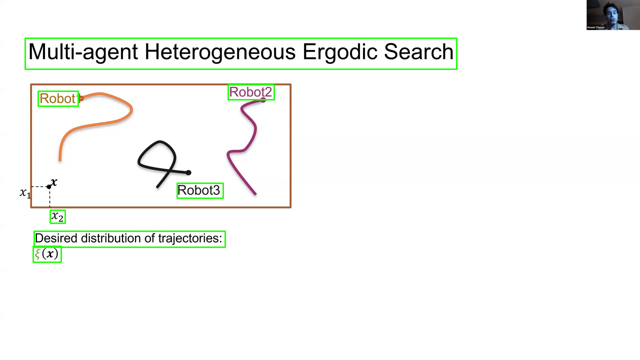

,bbox,width,height,text,fontsize
0,"[76, 138, 50, 913]",863,62,MULTI-AGENT HETEROGENENOUS ERGOIC SEARCH,21.575000
1,"[169, 199, 456, 548]",92,30,ROBOT2,15.333333
2,"[182, 212, 76, 156]",80,30,ROBOT,16.000000
3,"[366, 396, 354, 446]",92,30,ROBOT3,15.333333
4,"[420, 446, 100, 130]",30,26,X2,15.000000


In [6]:
from IPython.display import display, JSON, Image as IImage

def draw_boxes(frame, boxes):
    for box in boxes:
        frame = cv2.rectangle(frame, (box[2], box[0]), (box[3], box[1]), (36,255,12), 2)
    return frame

demo_id = presentations[-2]
demo_states = list_changes(f'{data_dir}/{demo_id}')

# Pick states #346 and #347 for inspection
state_before, state_after = demo_states[346], demo_states[347]

ocr_before = pd.read_json(state_before['ocr_path'])
boxes_before = [ box['bbox'] for box in ocr_before['boxes'] ]

frame_before = cv2.imread(state_before['end_frame'])
frame_before_debug = draw_boxes(frame_before,  boxes_before)

display(f"Presentation ID: {demo_id}, State #346: Frames {state_before['begin']}-{state_before['end']}", 
    Image.fromarray(frame_before_debug).resize((640,360)), pd.DataFrame(list(ocr_before['boxes'])))

#### There seems to be several textboxes appeared at a frame **#7850** (state **#347**)

'Presentation ID: V2hAJBxqSEKcpKQESydPxQ%3D%3D_2, State #347: Frames 7850-7851'

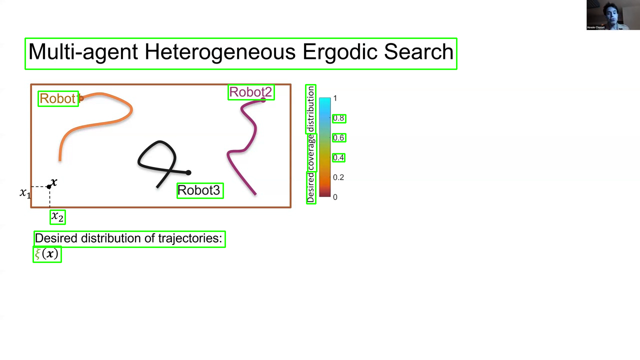

,bbox,width,height,text,fontsize
0,"[76, 138, 50, 913]",863,62,MULTI-AGENT HETEROGENENOUS ERGOIC SEARCH,21.575000
1,"[169, 199, 456, 548]",92,30,ROBOT2,15.333333
2,"[182, 212, 76, 156]",80,30,ROBOT,16.000000
3,"[169, 267, 611, 631]",20,98,DISTRIBUTION,1.666667
4,"[229, 245, 665, 691]",26,16,0.8,8.666667


In [5]:
ocr_after = pd.read_json(state_after['ocr_path'])['boxes']
data_after = pd.DataFrame(list(ocr_after))
boxes_after = [ box['bbox'] for box in ocr_after ]

frame_after = cv2.imread(state_after['begin_frame'])
frame_after_debug = draw_boxes(frame_after.copy(),  boxes_after)

display(f"Presentation ID: {demo_id}, State #347: Frames {state_after['begin']}-{state_after['end']}",
    Image.fromarray(frame_after_debug).resize((640,360)), data_after.head(5))

#### Let's use deeplab model to perform sample title segmentation of a state **#347** . To achieve this, we will calculate "title probability" for each textbox in green

'Presentation ID: V2hAJBxqSEKcpKQESydPxQ%3D%3D_2, State #347: Frames 7850-7851'

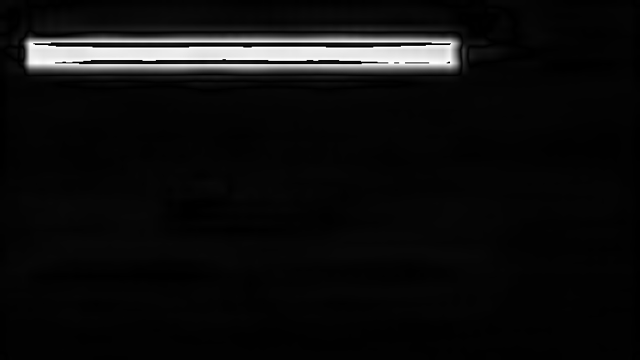

,bbox,width,height,text,fontsize,score
0,"[76, 138, 50, 913]",863,62,MULTI-AGENT HETEROGENENOUS ERGOIC SEARCH,21.575000,0.883776
1,"[169, 199, 456, 548]",92,30,ROBOT2,15.333333,-0.011067
2,"[182, 212, 76, 156]",80,30,ROBOT,16.000000,-0.018507
3,"[169, 267, 611, 631]",20,98,DISTRIBUTION,1.666667,-0.015679
4,"[229, 245, 665, 691]",26,16,0.8,8.666667,-0.017535


In [10]:
out, scores = titlesegment(frame_after, boxes_after)
out_mask = (np.abs(out.cpu().numpy())*255).astype(np.uint8)

data_after['score'] = scores

display(f"Presentation ID: {demo_id}, State #347: Frames {state_after['begin']}-{state_after['end']}",
    Image.fromarray(out_mask).resize((640,360)), data_after.head(5))

#### OCR algorithms can be incosistent when "reading" same set of characters with slight visual differences. To properly track slide titles throughout presentation, we will be fuzzy matching titles of different states to aggregate them as a *single slide state*

In [4]:
from Levenshtein import distance

def sametitle(t1, t2):
    t1 =  ''.join([ c for c in t1.lower() if c.isalnum() ])
    t2 =  ''.join([ c for c in t2.lower() if c.isalnum() ])
    return distance(t1, t2) <= 1

#### Final step of the solution: segment a title of each state, aggregate states with the same title and output a dataframe with predictions

In [22]:
def occupation(boxes):
    area = lambda b: (b[1]-b[0]) * (b[3]-b[2])
    y1, y2 = min([b[0] for b in boxes ]), max([b[1] for b in boxes ])
    x1, x2 = min([b[2] for b in boxes ]), max([b[3] for b in boxes ])
    return 1.0 * sum([ area(b) for b in boxes ]) / area([y1, y2, x1, x2])


def pickonetitle(boxes, scores):
    if len(boxes) == 0:
        return []
        
    best_idx = np.argmax(scores)
    best = boxes[best_idx]

    candidates = { i for i, box in enumerate(boxes) 
        if abs(box['fontsize']-best['fontsize']) <= best['fontsize'] * 0.25 
            and scores[best_idx] - scores[i] < 0.6 }
    
    while occupation([ boxes[i]['bbox'] for i in candidates ]) < 0.75:
        combinations = [ candidates - {j} for j in candidates if j != best_idx ]
        candidates = max(combinations, 
            key=lambda comb: occupation([ boxes[j]['bbox'] for j in comb ]))
            
    title_boxes = [ boxes[i] for i in candidates ]
    return title_boxes


log = []

for pres_id in presentations:
    data_path = f'{data_dir}/{pres_id}'
    groundtruth_path = f'{input_dir}/{pres_id}/groundtruth.csv'
    
    slides = []

    for state in list_changes(data_path):
        # If state is too short, it's probably(!) not worth analyzing
        if state['end'] - state['begin'] < 25:
            continue
        
        frame = cv2.imread(state['begin_frame']) 
        ocr = pd.read_json(state['ocr_path'])
        boxes = [ box for box in ocr['boxes'] if box['bbox'][1] > 0.19*frame.shape[0] or box['bbox'][2] < 0.81 * frame.shape[1] ] 
        
        out, boxes_scores = titlesegment(frame, [box['bbox'] for box in boxes])
        title_boxes = pickonetitle(boxes, boxes_scores)
        
        # Sort text boxes as you would read it in English: from top to bottom
        # and from left to right
        title_boxes = sort_boxes(title_boxes)
        title = ' '.join(box['text'] for box in title_boxes)

        # Possibly no text on a screen, we should either skip this
        # segment or mark it as a no title case
        if len(title_boxes) == 0:
            continue
        
        if len(slides) == 0 or not sametitle(slides[-1]['title1'], title):
            slides.append({ 'starting_frame': state['begin'], 'ending_frame': state['end'], 
                            'title1': title, 'title2': None, 'title3': None, 'title4': None })

        slides[-1]['ending_frame'] = state['end']
        
    slides = [ slide for slide in slides if slide['ending_frame'] - slide['starting_frame'] >= 50 ]
        
    predicted = pd.DataFrame(slides)
    groundtruth = pd.read_csv(groundtruth_path)
    
    acc = accuracy(predicted, groundtruth)
    
    print(f'Presentation ID: {pres_id}')
    print(f"Final Acc: {acc['fa']}, Boundary Acc: {acc['ba']}, Title Acc: {acc['ta']}")
    
    log.append(acc)


Presentation ID: JWgQihlwRhuKx02B0rSvUQ%3D%3D_1
Final Acc: 0.595345744680851, Boundary Acc: 0.6914893617021277, Title Acc: 0.53125
Presentation ID: R55BJMpCQdSkaM1spTk3FA%3D%3D_7
Final Acc: 0.7214285714285713, Boundary Acc: 0.8928571428571429, Title Acc: 0.6071428571428571
Presentation ID: Ln5Jf7iJSJiKKZEmeGBwaw%3D%3D_2
Final Acc: 0.4416666666666666, Boundary Acc: 0.5416666666666666, Title Acc: 0.375
Presentation ID: TzJaOnxUS2eNUw2wxq9OPQ%3D%3D_0
Final Acc: 0.6818181818181819, Boundary Acc: 0.6818181818181818, Title Acc: 0.6818181818181818
Presentation ID: q358OEVgS7mudGdSM31j0w%3D%3D_1
Final Acc: 0.38627450980392153, Boundary Acc: 0.5980392156862745, Title Acc: 0.24509803921568626
Presentation ID: Ln5Jf7iJSJiKKZEmeGBwaw%3D%3D_5
Final Acc: 0.16999999999999998, Boundary Acc: 0.35, Title Acc: 0.05
Presentation ID: s8H3LiURQ0GKo3Kt%2BryIZQ%3D%3D_1
Final Acc: 0.44396135265700487, Boundary Acc: 0.8043478260869565, Title Acc: 0.2037037037037037
Presentation ID: mpHqM1j%2FSDeVLzWi%2B9456w%3D

In [195]:
predicted

,starting_frame,ending_frame,title1,title2,title3,title4
0,33,3023,MORE MORE EXPLORING POSSIBLE CLIMATES WITH EAR...,None,None,None
1,3024,3867,PHILOSOPHICAL TRANSACTIONS A MACHINE LEARNING ...,None,None,None
2,3868,8095,ML FOR WEATHER AND CLIMATE ARE,None,None,None
3,8096,10166,CIMATE PROJECTIONS: CMIP6,None,None,None
4,10167,11849,SOURCES OF UNDERTAINTY,None,None,None
5,11850,11965,EMULATING CLIMATE MODELS FOR CALIBATION.,None,None,None
6,11966,14774,EXPLORING PARAMETRIC UNDERTAINTY,None,None,None
7,14775,17037,LIKEIHOOD-FREE INTERENCE,None,None,None
8,17038,19189,IMPLAUSIBILITY,None,None,None
9,19190,21613,EMULATION,None,None,None


In [196]:
groundtruth

,starting_frame1,starting_frame2,ending_frame1,ending_frame2,title1,title2,title3,title4,bonus_title1,bonus_title2,is_hybrid
0,33,33,3023,3023,More More - exploring possible climates with E...,NaN,NaN,NaN,NaN,NaN,False
1,3024,3024,3867,3867,Machine learning for weather and climate are w...,NaN,NaN,NaN,NaN,NaN,False
2,3868,3868,8095,8095,ML for Weather and Climate are worlds apart,NaN,NaN,NaN,NaN,NaN,False
3,8096,8096,10166,10166,Climate projections: CMIP6,NaN,NaN,NaN,NaN,NaN,False
4,10167,10167,11753,11753,Sources of uncertainty,NaN,NaN,NaN,NaN,NaN,False
5,11754,11754,11849,11849,Sources of uncertainty,NaN,NaN,NaN,NaN,NaN,False
6,11850,11850,11965,11965,Emulating climate models for calibration,NaN,NaN,NaN,NaN,NaN,False
7,11966,11966,14774,14774,Exploring parametric uncertainty,NaN,NaN,NaN,NaN,NaN,False
8,14775,14775,17037,17037,Likelihood-Free inference,NaN,NaN,NaN,NaN,NaN,False
9,17038,17038,19189,19189,Implausibility,NaN,NaN,NaN,NaN,NaN,False
